In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [2]:
df = pd.read_csv("shampoo.csv")
df['Month'] = pd.date_range(start='1900-01-01', periods=len(df), freq='M')
df.set_index('Month', inplace=True)
df.head()


C:\Users\rodle\AppData\Local\Temp\ipykernel_33668\3953569011.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='1900-01-01', periods=len(df), freq='M')


,Sales
Month,
1900-01-31,266.0
1900-02-28,145.9
1900-03-31,183.1
1900-04-30,119.3
1900-05-31,180.3


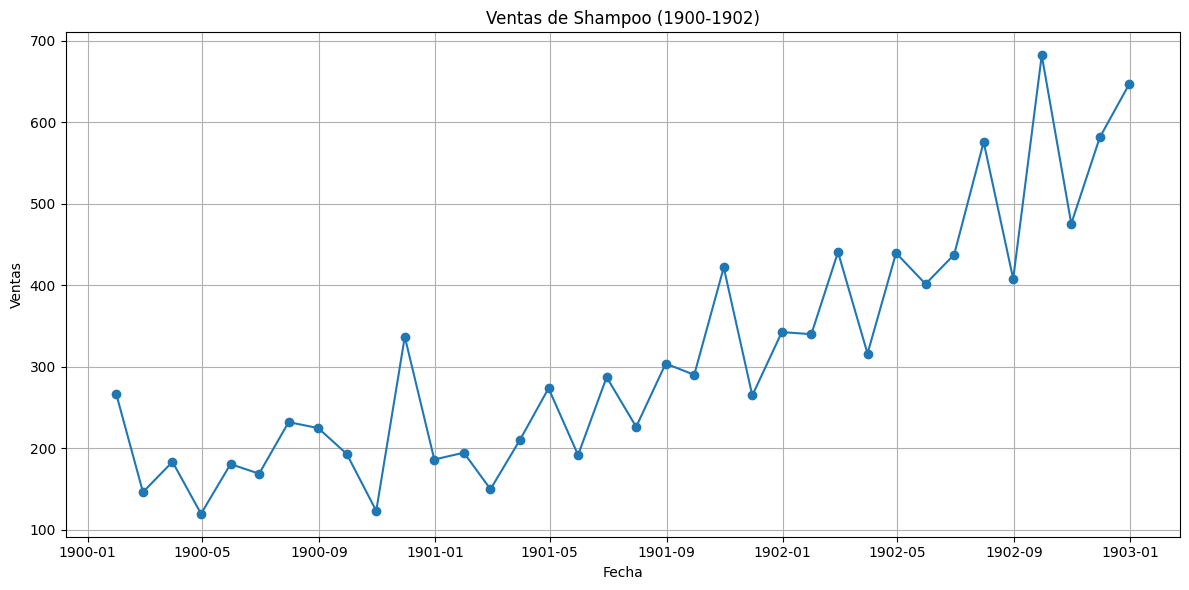

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], marker='o')
plt.title('Ventas de Shampoo (1900-1902)')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()


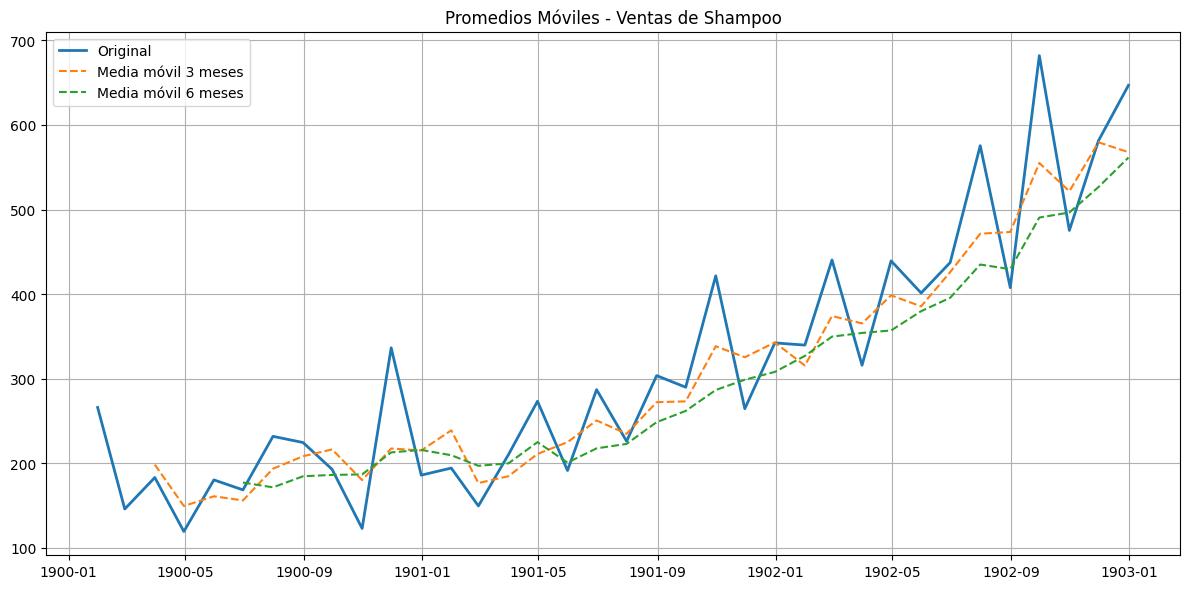

In [4]:
df['SMA_3'] = df['Sales'].rolling(window=3).mean()
df['SMA_6'] = df['Sales'].rolling(window=6).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Original', linewidth=2)
plt.plot(df['SMA_3'], label='Media móvil 3 meses', linestyle='--')
plt.plot(df['SMA_6'], label='Media móvil 6 meses', linestyle='--')
plt.title('Promedios Móviles - Ventas de Shampoo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


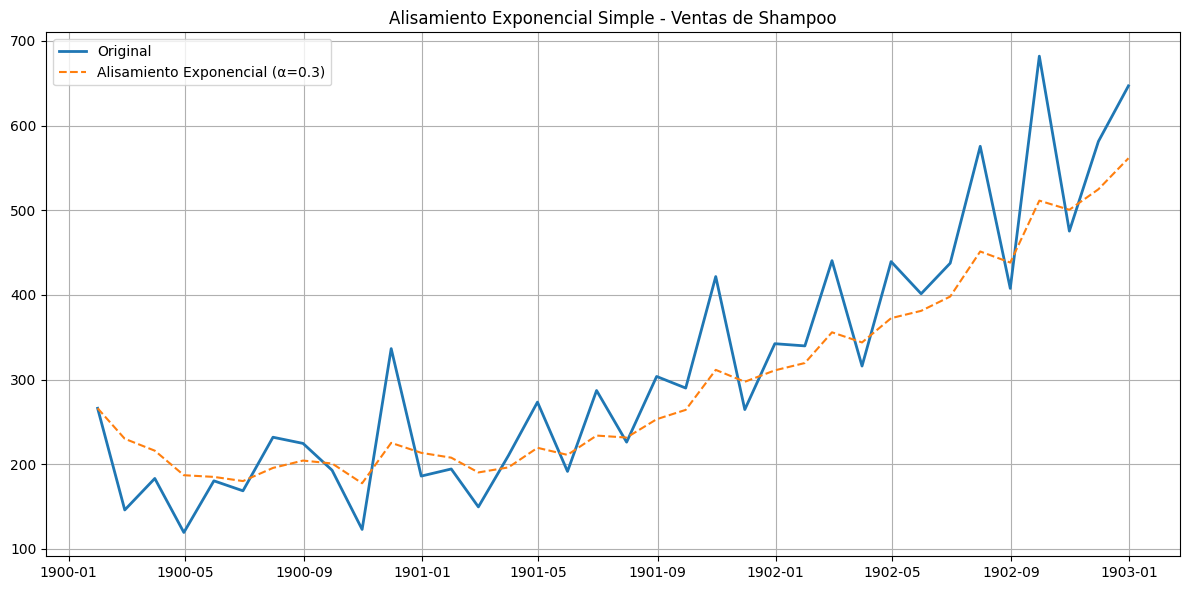

In [5]:
alpha = 0.3
df['SES'] = df['Sales'].ewm(alpha=alpha, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Original', linewidth=2)
plt.plot(df['SES'], label=f'Alisamiento Exponencial (α={alpha})', linestyle='--')
plt.title('Alisamiento Exponencial Simple - Ventas de Shampoo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\rodle\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


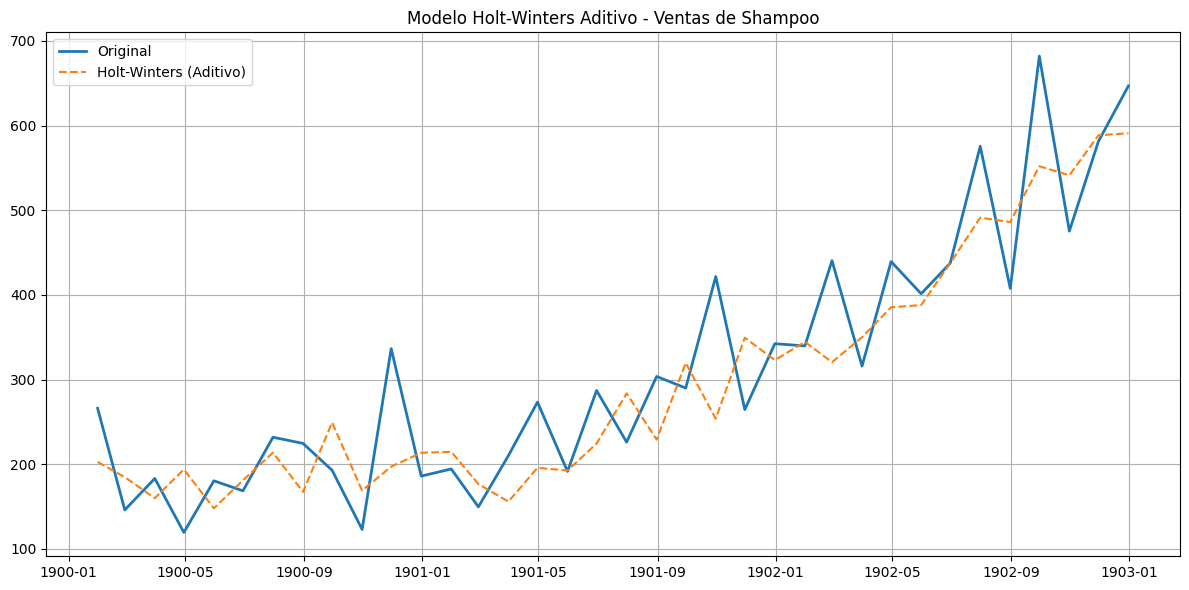

In [6]:
modelo_hw = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['HW_add'] = modelo_hw.fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Original', linewidth=2)
plt.plot(df['HW_add'], label='Holt-Winters (Aditivo)', linestyle='--')
plt.title('Modelo Holt-Winters Aditivo - Ventas de Shampoo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
adf_result = adfuller(df['Sales'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])


ADF Statistic: 3.0601420836411815
p-value: 1.0
Critical Values: {'1%': np.float64(-3.7238633119999998), '5%': np.float64(-2.98648896), '10%': np.float64(-2.6328004)}


In [8]:
df['Sales_diff'] = df['Sales'].diff()
adf_result_diff = adfuller(df['Sales_diff'].dropna())
print("ADF Statistic (diferenciada):", adf_result_diff[0])
print("p-value:", adf_result_diff[1])
print("Critical Values:", adf_result_diff[4])


ADF Statistic (diferenciada): -7.249074055553854
p-value: 1.7998574141687034e-10
Critical Values: {'1%': np.float64(-3.6461350877925254), '5%': np.float64(-2.954126991123355), '10%': np.float64(-2.6159676124885216)}


c:\Users\rodle\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\rodle\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\rodle\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\rodle\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

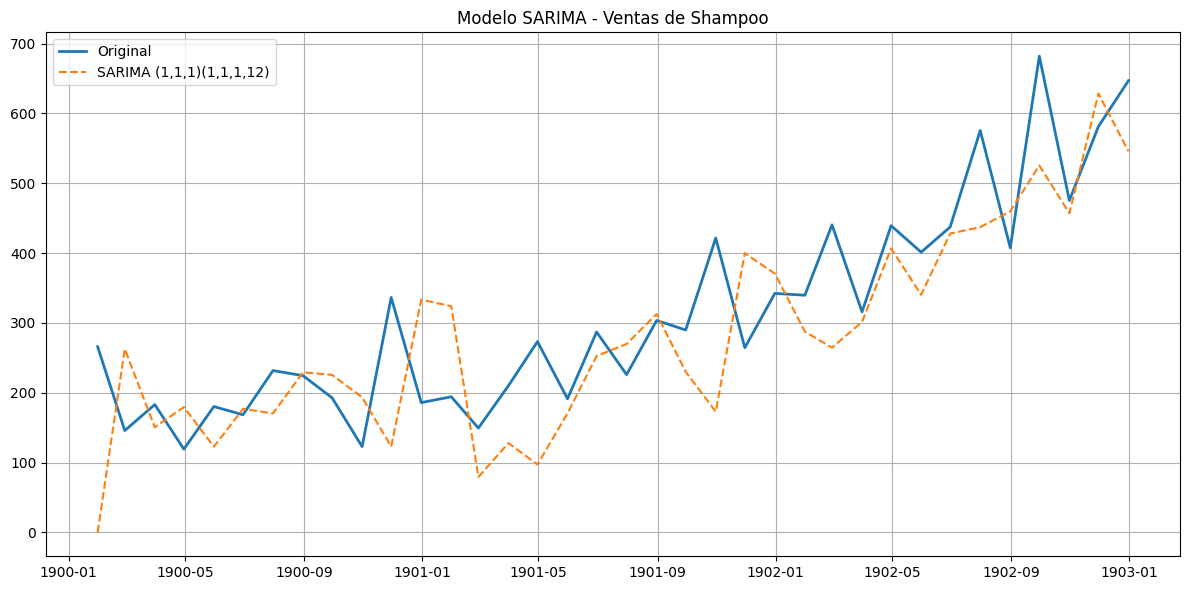

In [9]:
model_sarima = SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
df['SARIMA_pred'] = model_sarima.fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Original', linewidth=2)
plt.plot(df['SARIMA_pred'], label='SARIMA (1,1,1)(1,1,1,12)', linestyle='--')
plt.title('Modelo SARIMA - Ventas de Shampoo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
original = df['Sales'].dropna()
models = {
    'SES': df['SES'],
    'Holt-Winters': df['HW_add'],
    'SARIMA': df['SARIMA_pred']
}

results = []
for name, prediction in models.items():
    aligned = original.align(prediction, join='inner')
    mae = mean_absolute_error(aligned[0], aligned[1])
    rmse = mean_squared_error(aligned[0], aligned[1], squared=False)
    results.append((name, mae, rmse))

df_resultados = pd.DataFrame(results, columns=['Modelo', 'MAE', 'RMSE'])
df_resultados


TypeError: got an unexpected keyword argument 'squared'